In [232]:
import os
from os.path import dirname, join
from pprint import pprint
import pydicom
from pydicom.data.data_manager import get_files
from pydicom.filereader import read_dicomdir

In [3]:
files_arr = get_files(r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT',
                     r'CT_1.2.276.0.7230010.3.1.4.1417964692')

'RLAD31D006-11315_RLS5A09001KDC6-K00008714.json'

In [8]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

# fetch the path to the test data
#filepath = get_testdata_file('DICOMDIR')

# Код перенесен выше
# files_arr = get_files(r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT',
#                      r'CT_1.2.276.0.7230010.3.1.4.1417964692')
# print('Path to the DICOM directory: {}'.format(filepath))
# # load the data
for item in files_arr:
    dicom_dir = read_dicomdir(item)
    base_dir = dirname(item)


    # print(dicom_dir)
    # print(dicom_dir.patient_records)

    # go through the patient record and print information
    for patient_record in files_arr:
        if (hasattr(patient_record, 'PatientID') and
                hasattr(patient_record, 'PatientName')):
            print("Patient: {}: {}".format(patient_record.PatientID,
                                           patient_record.PatientName))
        studies = patient_record.children
        # got through each serie
        for study in studies:
            print(" " * 4 + "Study {}: {}: {}".format(study.StudyID,
                                                      study.StudyDate,
                                                      study.StudyDescription))
            all_series = study.children
            # go through each serie
            for series in all_series:
                image_count = len(series.children)
                plural = ('', 's')[image_count > 1]

                # Write basic series info and image count

                # Put N/A in if no Series Description
                if 'SeriesDescription' not in series:
                    series.SeriesDescription = "N/A"
                print(" " * 8 + "Series {}: {}: {} ({} image{})".format(
                    series.SeriesNumber, series.Modality, series.SeriesDescription,
                    image_count, plural))

                # Open and read something from each image, for demonstration
                # purposes. For simple quick overview of DICOMDIR, leave the
                # following out
                print(" " * 12 + "Reading images...")
                image_records = series.children
                image_filenames = [join(base_dir, *image_rec.ReferencedFileID)
                                   for image_rec in image_records]

                datasets = [pydicom.dcmread(image_filename)
                            for image_filename in image_filenames]

                patient_names = set(ds.PatientName for ds in datasets)
                patient_IDs = set(ds.PatientID for ds in datasets)

                # List the image filenames
                print("\n" + " " * 12 + "Image filenames:")
                print(" " * 12, end=' ')
                pprint(image_filenames, indent=12)

                # Expect all images to have same patient name, id
                # Show the set of all names, IDs found (should each have one)
                print(" " * 12 + "Patient Names in images..: {}".format(
                    patient_names))
                print(" " * 12 + "Patient IDs in images..: {}".format(
                    patient_IDs))

InvalidDicomError: File 'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16972' is not a Media Storage Directory file

In [3]:
ds = pydicom.dcmread("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")

In [ ]:
pydicom.read_file("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")

In [10]:
ds.SliceLocation
# Поиск нужного слайда по z
def z_finder():
    for item in files_arr:
        #print(item)
        rf = pydicom.read_file(item)
        if rf.ImagePositionPatient[2] == 1737.3:
            plt.imshow(rf.pixel_array, cmap='gray', interpolation='none') 
        #print(rf.ImagePositionPatient)
        #print(f'Location: {rf.SliceLocation}, Instance Number: {rf.InstanceNumber}')
        #plt.imshow(rf.pixel_array, cmap='gray') 

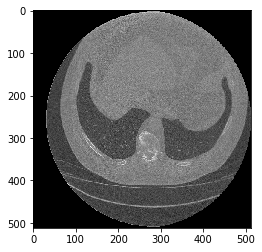

In [11]:
z_finder()

In [52]:
ds.ImagePositionPatient[2]

"1725.3"

In [2]:
files_arr[1]

NameError: name 'files_arr' is not defined

In [10]:
ds.PixelData

b'\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\x

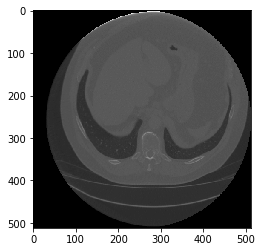

In [12]:
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array, cmap='gray') 

In [26]:
dspa = ds.pixel_array
dspa.shape

(512, 512)

In [14]:
ds.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [13]:
len(files_arr)
len(set(files_arr))

1743

In [17]:
get_testdata_file(r'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')

In [ ]:
DATA_ROOT = abspath(dirname(__file__))
data_path = join(DATA_ROOT, 'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')
for root, _, filenames in os.walk(data_path):
    for filename in filenames:
        if filename == name:
            return os.path.join(root, filename)

In [20]:
# https://stackoverflow.com/questions/53837060/extract-sagittal-and-coronal-cuts-from-axial-view-using-pydicom
import os
import numpy as np
import pydicom as dicom
from matplotlib import pyplot as plt

#root_dir = r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT'


def sortDcm():
        # print('Given Path to the .dcm directory is: {}'.format(root_dir))
        # slices = [dicom.read_file(root_dir + '/' + s) for s in os.listdir(root_dir)]
        slices = [pydicom.read_file(s) for s in files_arr]
        slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
        pos1 = slices[int(len(slices)/2)].ImagePositionPatient[2]
        pos2 = slices[(int(len(slices)/2)) + 1].ImagePositionPatient[2]
        diff = pos2 - pos1
#        if diff > 0:
#            slices = np.flipud(slices)
        try:
            slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
        except:
            slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

        for s in slices:
            s.SliceThickness = slice_thickness
#        print("from sorted dicom",len(slices))         
        return slices 


dcms = sortDcm()
ref_dicom = dcms[0]

d_array = np.zeros((ref_dicom.Columns,ref_dicom.Rows, len(dcms)), dtype=ref_dicom.pixel_array.dtype)

# for dcm in dcms:
#     d_array[:, :, dcms.index(dcm)] = dcm.pixel_array
#     #i = 1
#     #while i < 2:
# #         fig = plt.figure(figsize=(12,12))
# #         plt.subplot(1, 3, 1)
# #         plt.title("Coronal")
# #         plt.imshow(np.flipud(d_array[idx , :, :].T))
# #         #plt.subplot(1, 3, 2)
# #         plt.title("Sagital")
# #         plt.imshow(np.flipud(d_array[:, idy, :].T))
# #         plt.subplot(1, 3, 3)
#     plt.title("axial")
#     plt.imshow(d_array[:, :, dcms.index(dcm)])
#     plt.pause(0.001)
#     #i += 1

In [24]:

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
#then to view sagittal and coronal slices for each of the axial slice
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
    corId = corId-1
    sagId = sagId-1
#    plot 3 orthogonal slices
    a1 = plt.subplot(1,3,1)
    plt.title('Axial')
    plt.imshow(img3d[:,:,i],'gray')
    a1.set_aspect(ax_aspect)

    a2 = plt.subplot(1,3,2)
    plt.title('Sagittal')
    plt.imshow(np.flipud(img3d[:,sagId,:].T),'gray')
    a2.set_aspect(sag_aspect)

    a3 = plt.subplot(1,3,3)
    plt.imshow(np.flipud(img3d[corId,:,:].T),'gray')
    a3.set_aspect(cor_aspect)
    plt.title('Coronal')
    plt.show()
    plt.pause(0.001)  

In [ ]:
"""usage: reslice.py <glob>
where <glob> refers to a set of DICOM image files.

Example: python reslice.py "*.dcm". The quotes are needed to protect the glob
from your system and leave it for the script."""

import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files=[]
print('glob: {}'.format(sys.argv[1]))
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.read_file(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices=[]
skipcount=0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d=np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2,2,1)
plt.imshow(img3d[:,:,img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2,2,2)
plt.imshow(img3d[:,img_shape[1]//2,:])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2,2,3)
plt.imshow(img3d[img_shape[0]//2,:,:].T)
a3.set_aspect(cor_aspect)

plt.show()

### Получение фронтальных сечений со слоем интереса

In [259]:
# Получение списка всех dicom файлов
dicom_patch = "D:\For_Publication_v3\Для публикации v3\Dicom"
dicom_name_1 = os.listdir(path=dicom_patch)

dicom_name_full = []
for item in dicom_name_1:
    dicom_name_full.append(dicom_patch + '\\' + item)

# dicom_name_2 = os.listdir(path=dicom_name_full[0])

# for item in dicom_name_2:
#     dicom_name_full_2.append()

['CT']

In [264]:
# for top, dirs, files in os.walk('D:\For_Publication_v3\Для публикации v3\Dicom'):
#     for nm in files:       
#         print (os.path.join(top, nm))
tree = os.walk('D:\For_Publication_v3\Для публикации v3\Dicom')

In [277]:
a = []
for i in os.walk('D:\For_Publication_v3\Для публикации v3\Dicom'):
    a.append(i)

In [292]:
a[7]

('D:\\For_Publication_v3\\Для публикации v3\\Dicom\\RLAD31D006-12322_RLS5A09001KDC6-K00004491',
 ['CT'],
 [])

In [295]:
b = a[::4]

In [299]:
c = b[::3]

In [302]:
main_res = {}
for i in range(1, len(c)):
    main_res[c[i][0]] = c[i][2]

In [310]:
main_res['D:\\For_Publication_v3\\Для публикации v3\\Dicom\\RLAD31D006-12323_RLS5A09001KDC6-K00004273\\CT\\Chest HCT'][17]

'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348603'

In [306]:
main_res

{'D:\\For_Publication_v3\\Для публикации v3\\Dicom\\RLAD31D006-12323_RLS5A09001KDC6-K00004273\\CT\\Chest HCT': ['CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348586',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348587',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348588',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348589',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348590',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348591',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348592',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348593',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348594',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348595',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348596',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348597',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348598',
  'CT_1.2.276.0.723

In [253]:
files_arr

['C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16972',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16973',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16974',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16975',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16976',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16977',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010

In [5]:
"""Измененный скрипт загрузки"""

import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files=[]

print('glob: {}'.format(sys.argv[1]))
print('loading start...')
for fname in files_arr:
    
    #print("loading: {}".format(fname))
    files.append(pydicom.read_file(fname))

print("Loading done. File count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices=[]
skipcount=0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
print('Sorting start...')
slices = sorted(slices, key=lambda s: s.SliceLocation)
print('Sorting complete.')
# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
print('create 3D array start...')
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d=np.zeros(img_shape)
print('create 3D array complete.')


# fill 3D array with the images from the files и добавление з
print('fill 3D array start...')
ipp = [] # ImagePositionPatient[2] будет храниться тут
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
    ipp.append(slices[i].ImagePositionPatient[2])
print('fill 3D array complete.')

#print(ipp)
# plot 3 orthogonal slices
# a1 = plt.subplot(2,2,1)
# plt.imshow(img3d[:,:,img_shape[2]//2])
# a1.set_aspect(ax_aspect)

# a2 = plt.subplot(2,2,2)
# plt.imshow(img3d[:,img_shape[1]//2,:])
# a2.set_aspect(sag_aspect)

# a3 = plt.subplot(2,2,3)
# plt.imshow(img3d[img_shape[0]//2,:,:].T)
# a3.set_aspect(cor_aspect)

# plt.show()

glob: -f
loading start...
Loading done. File count: 1743
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.


In [18]:
print(len(ipp))
print(ipp.index(1903.5))
print(max(ipp))
print(min(ipp))
print(max(ipp) - min(ipp))

1743
592
2032.500
1652.500
380.0


In [38]:
cor_aspect

1.0121457489878543

In [32]:
sys.argv

['C:\\Users\\nonam\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\nonam\\AppData\\Roaming\\jupyter\\runtime\\kernel-c59ef720-6b26-4a77-9330-1777800fded4.json']

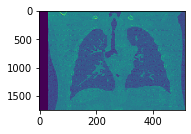

In [95]:
a3 = plt.subplot(2,2,3)
plt.imshow(img3d[img_shape[0]//2,:,:].T)
a3.set_aspect(0.2)
plt.show()

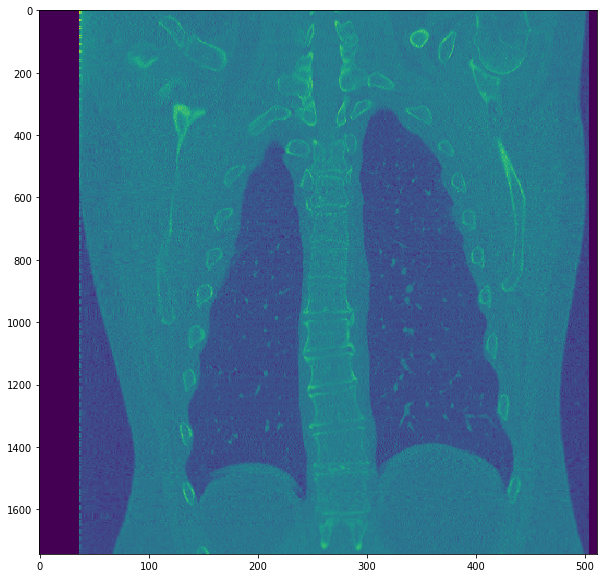

In [117]:
smile = img3d[314,:,:].T

fig, ax = plt.subplots()

ax.imshow(smile, aspect='auto')

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

In [111]:
img_shape[0]//2

256

width: 4.048582995951392, height: 4.048582995951392


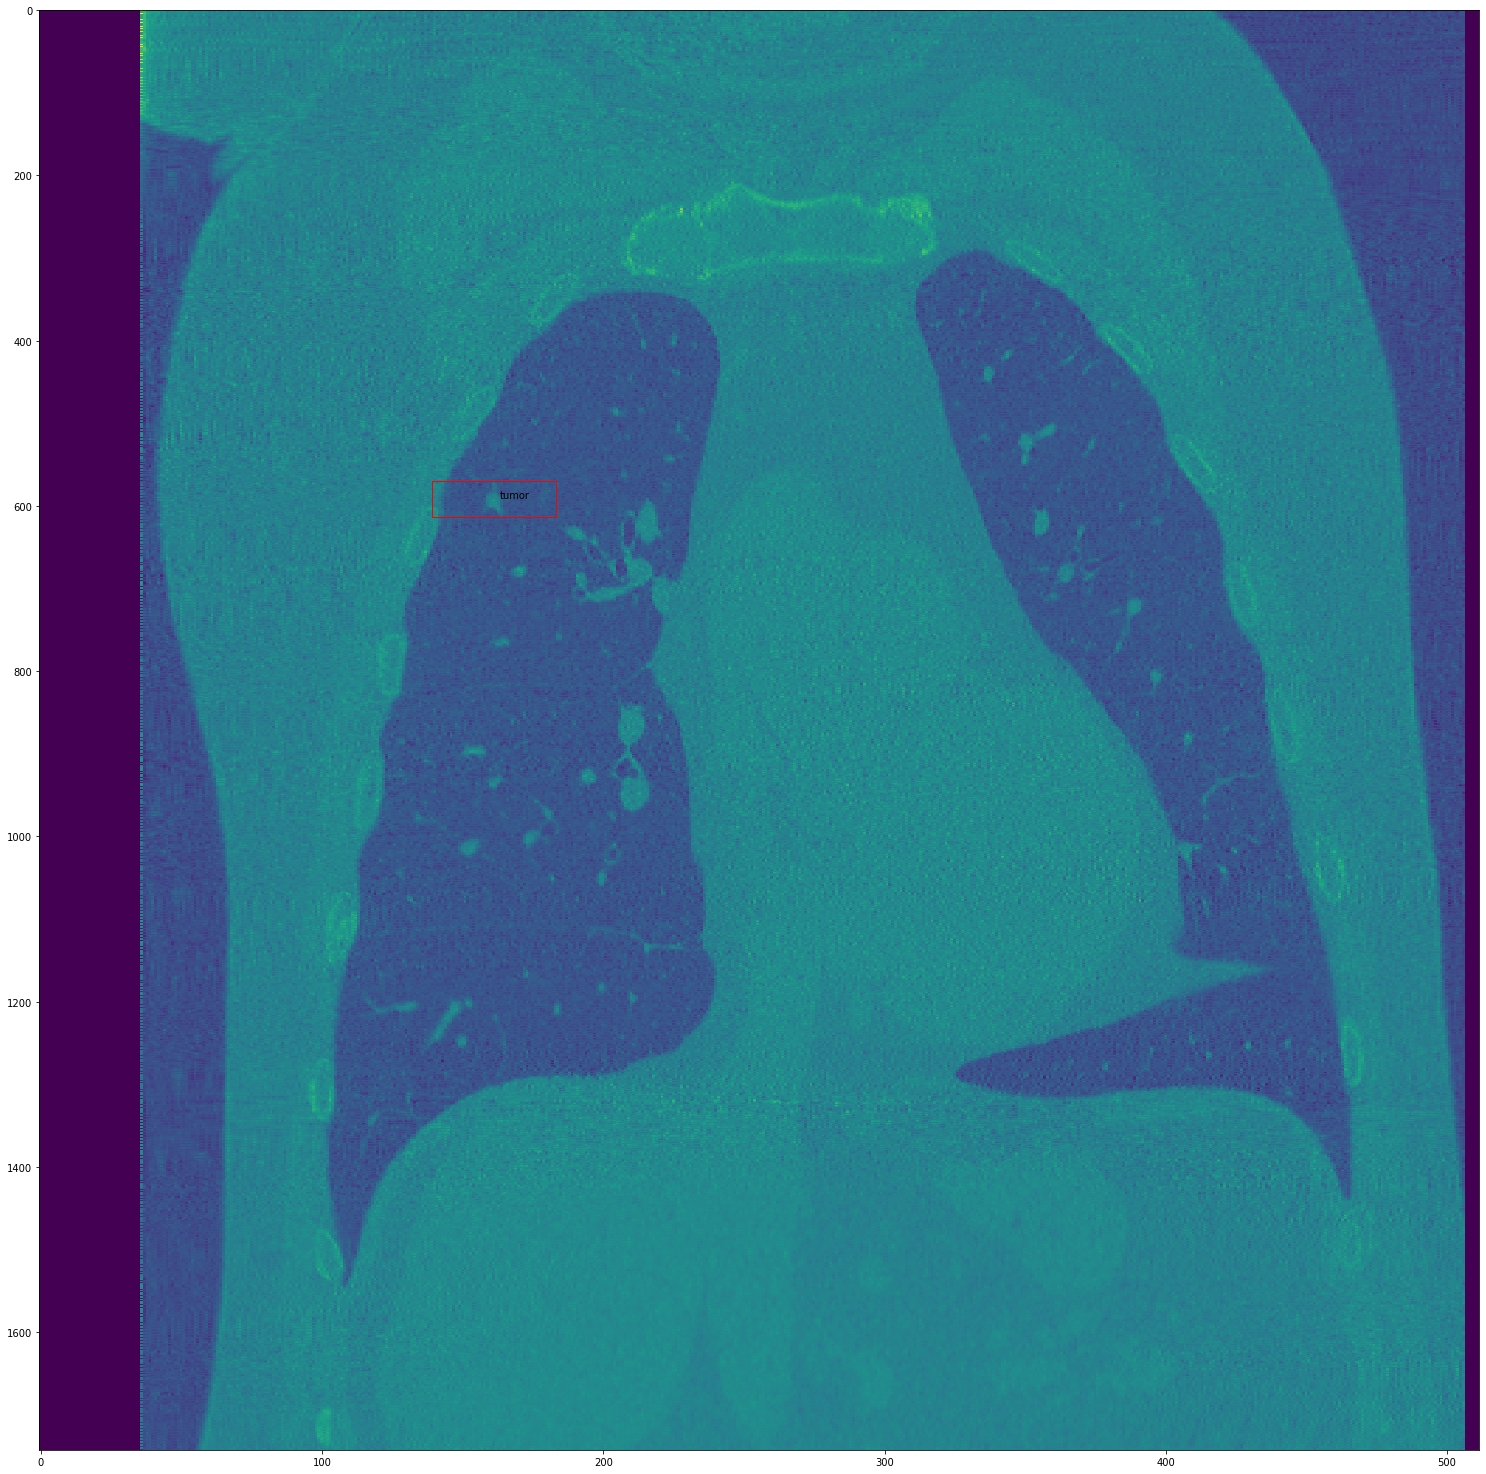

In [49]:
# Отрисовка рамки
from matplotlib import patches
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])
#def Patchfinder():
x = 161 # x на фронтальном срезе
y = 204 # z на фронтальном срезе
zm = 1903.5 # y на фронтальном срезе
z = ipp.index(zm)
dm = 4
d = dm / slices[0].PixelSpacing[0]
xmin = x - d / 2
xmax = x + d / 2
ymin = z - d / 2
ymax = z + d / 2
width = xmax - xmin
height = ymax - ymin
print(f'width: {width}, height: {height}')
# read and plot the image
image = img3d[y,:,:].T
plt.imshow(image, aspect='auto')

edgecolor = 'r'
ax.annotate('tumor', xy=(xmax,ymin))
# rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
rect = patches.Rectangle((xmin-20,ymin-20), width+40, height+40, edgecolor = edgecolor, facecolor = 'none')
ax.add_patch(rect)
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(20)    #  высота "Figure"

# iterating over the image for different objects
# for _,row in train[train.image_names == "1.jpg"].iterrows():
#     xmin = row.xmin
#     xmax = row.xmax
#     ymin = row.ymin
#     ymax = row.ymax
    
#     width = xmax - xmin
#     height = ymax - ymin
    
#     # assign different color to different classes of objects
#     if row.cell_type == 'RBC':
#         edgecolor = 'r'
#         ax.annotate('RBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'WBC':
#         edgecolor = 'b'
#         ax.annotate('WBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'Platelets':
#         edgecolor = 'g'
#         ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
#     # add bounding boxes to the image
#     rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
#     ax.add_patch(rect)

# Поиск нужного слайда по z
def z_finder():
    for item in files_arr:
        #print(item)
        rf = pydicom.read_file(item)
        if rf.ImagePositionPatient[2] == 1737.3:
            plt.imshow(rf.pixel_array, cmap='gray', interpolation='none') 
        #print(rf.ImagePositionPatient)
        #print(f'Location: {rf.SliceLocation}, Instance Number: {rf.InstanceNumber}')
        #plt.imshow(rf.pixel_array, cmap='gray') 



In [125]:
img3d.shape
slices[0].ImagePositionPatient[2]

(512, 512, 1743)

In [20]:
slices[0].PixelSpacing[0]

"0.988"

In [35]:
dm = 4
d = dm / slices[0].PixelSpacing[0]
d

4.048582995951417

In [36]:
slices[0].PixelSpacing[0]

"0.988"

In [38]:
max(ipp)

"2032.5"

In [39]:
min(ipp)

"1652.5"

In [41]:
zm = 1903.5 # y на фронтальном срезе
z = ipp.index(zm)
z

592

In [43]:
len(ipp)

1743

In [44]:
ipp[0]

"2032.5"

In [46]:
ipp[1742]

"1652.5"

In [206]:
# Чтение Json файлов
import json
import pandas as pd
#js = pd.read_json ('RLADD01000009306_RLSDD01000009279.json', orient='records')
with open("RLADD01000009306_RLSDD01000009279.json", "r", encoding='utf-8') as read_file:
    a = str(read_file.read())
#     data = json.load(read_file, decode='utf-8')  # , decod='utf8'

In [207]:
a = a.replace('\n', '').replace('\t', '').replace('\ufeff', '')

In [208]:
# from pandas.io.json import json_normalize
b = json.loads(a)

In [209]:
b

{'doctors': [{'comment': '', 'id': '012'},
  {'comment': '', 'id': '013'},
  {'comment': '', 'id': '014'}],
 'ids': {'accession number': 'RLADD01000009306',
  'study id': 'RLSDD01000009279',
  'study instance uid': '1.2.276.0.7230010.3.1.2.1417964692.10880.1568735355.16970'},
 'nodules': [[{'012': {'diameter (mm)': 3.5,
     'expert decision': [{'comment': '',
       'decision': 'doubt',
       'id': 'Валерия',
       'machine learning': False,
       'proper size': True,
       'type': 'с'}],
     'series no': '4',
     'type': 'с',
     'version': '4.0',
     'x': 358.0,
     'y': 314.0,
     'z': 1903.7,
     'z type': 'mm'},
    '013': None,
    '014': None}],
  [{'012': None,
    '013': {'diameter (mm)': 4.0,
     'expert decision': [{'comment': '',
       'decision': 'confirmed',
       'id': 'Валерия',
       'machine learning': True,
       'proper size': True,
       'type': 'п'}],
     'series no': '5',
     'type': 'п',
     'version': '4.0',
     'x': 161.0,
     'y': 204.0

### Работа с JSON

In [247]:
# Получение списка всех json файлов
json_patch = "D:\For_Publication_v3\Для публикации v3\Protocols"
json_name = os.listdir(path=json_patch)
json_name_full = []
for item in json_name:
    json_name_full.append(json_patch + '\\' + item)

In [248]:
json_name_full

['D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11864_RLS5A09001KDC6-N00009062.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-12322_RLS5A09001KDC6-K00004491.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-12323_RLS5A09001KDC6-K00004273.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-12484_RLS5A09001KDC6-K00009473.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-12518_RLS5A09001KDC6-K00009499.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-12985_RLS5A09001KDC6-K00009811.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-13199_RLSD31D006-13199.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-13373_RLSD31D006-13373.json',
 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-1338

In [239]:
jsonname

['RLAD31D006-11315_RLS5A09001KDC6-K00008714.json',
 'RLAD31D006-11864_RLS5A09001KDC6-N00009062.json',
 'RLAD31D006-12322_RLS5A09001KDC6-K00004491.json',
 'RLAD31D006-12323_RLS5A09001KDC6-K00004273.json',
 'RLAD31D006-12484_RLS5A09001KDC6-K00009473.json',
 'RLAD31D006-12518_RLS5A09001KDC6-K00009499.json',
 'RLAD31D006-12985_RLS5A09001KDC6-K00009811.json',
 'RLAD31D006-13199_RLSD31D006-13199.json',
 'RLAD31D006-13373_RLSD31D006-13373.json',
 'RLAD31D006-13380_RLSD31D006-13380.json',
 'RLAD31D006-13441_RLSD31D006-13441.json',
 'RLAD31D006-13646_RLSD31D006-13646.json',
 'RLAD31D006-13650_RLSD31D006-13650.json',
 'RLAD31D006-14010_RLSD31D006-14010.json',
 'RLAD31D006-14183_RLSD31D006-14183.json',
 'RLAD31D006-14207_RLSD31D006-14207.json',
 'RLAD31D006-14293_RLSD31D006-14293.json',
 'RLAD31D006-14415_RLSD31D006-14415.json',
 'RLAD31D006-14531_RLSD31D006-14531.json',
 'RLAD31D006-14596_RLSD31D006-14596.json',
 'RLAD31D006-14718_RLSD31D006-14718.json',
 'RLAD31D006-14949_RLSD31D006-14949.json'

In [222]:
# преобразование json в нормальный вид
def test(file_name):

    with open(file_name, "r", encoding='utf-8') as read_file:
        a = str(read_file.read())
    
    a = a.replace('\n', '').replace('\t', '').replace('\ufeff', '')
    b = json.loads(a)
    
    result = []

    for item in b['nodules']:
        temp = []
        for key, value in item[0].items():
            try:
                temp.append({'diameter': value['diameter (mm)'], 'x': value['x'], 'y': value['y'], 'z': value['z']})
            except:
                pass
        result.append(temp)
    return {'name': file_name, 'result_array': result}

In [223]:
t = test('RLADD01000009306_RLSDD01000009279.json')
t

{'name': 'RLADD01000009306_RLSDD01000009279.json',
 'result_array': [[{'diameter': 3.5, 'x': 358.0, 'y': 314.0, 'z': 1903.7}],
  [{'diameter': 4.0, 'x': 161.0, 'y': 204.0, 'z': 1903.5}],
  [{'diameter': 5.0, 'x': 215.0, 'y': 180.0, 'z': 1863.0}],
  [{'diameter': 3.7, 'x': 327.0, 'y': 345.0, 'z': 1737.3},
   {'diameter': 3.0000000000000004, 'x': 327.0, 'y': 344.0, 'z': 1737.3}]]}

In [250]:
file_list = ['RLADD01000009306_RLSDD01000009279.json', 'RLADD01000009306_RLSDD01000009279.json']
# Формирование списка всех параметров опухолей
new_res = []

for file in json_name_full:
    try:
        new_res.append(test(file))
    except:
        print(file)

D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-14010_RLSD31D006-14010.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-17012_RLSD31D006-17012.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000005928_RLSDD01000005911.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000007802_RLSDD01000007781.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000009500_RLSDD01000009473.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000010469_RLSDD01000010441.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000010708_RLSDD01000010680.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011007_RLSDD01000010978.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011304_RLSDD01000011275.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011677_RLSDD01000011647.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011678_RLSDD01000011648.json
D:\For_Publication_v3

In [252]:
new_res

[{'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json',
  'result_array': [[{'diameter': 6.000000000000001,
     'x': 400.0,
     'y': 281.0,
     'z': 1698.3}],
   [{'diameter': 6.000000000000001, 'x': 417.0, 'y': 251.0, 'z': 1632.7}],
   [{'diameter': 4.0, 'x': 422.0, 'y': 312.0, 'z': 1594.3},
    {'diameter': 4.0, 'x': 422.0, 'y': 314.0, 'z': 1595.1}],
   [{'diameter': 5.0, 'x': 85.0, 'y': 296.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 87.0, 'y': 297.0, 'z': 1593.5}]]},
 {'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11864_RLS5A09001KDC6-N00009062.json',
  'result_array': [[{'diameter': 6.000000000000001,
     'x': 73.0,
     'y': 296.0,
     'z': 1728.7}],
   [{'diameter': 4.0, 'x': 123.0, 'y': 167.0, 'z': 1689.5}]]},
 {'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols

In [251]:
new_res[1]['result_array'][0][0]['x']

73.0

In [221]:
t1 = []
t2 = []
t1.append(t2)
t1

[[]]

In [220]:
result

[[{'diameter': 3.5, 'x': 358.0, 'y': 314.0, 'z': 1903.7}],
 [{'diameter': 4.0, 'x': 161.0, 'y': 204.0, 'z': 1903.5}],
 [{'diameter': 5.0, 'x': 215.0, 'y': 180.0, 'z': 1863.0}],
 [{'diameter': 3.7, 'x': 327.0, 'y': 345.0, 'z': 1737.3},
  {'diameter': 3.0000000000000004, 'x': 327.0, 'y': 344.0, 'z': 1737.3}]]

In [ ]:
full = result.append('name')
full

In [203]:
b.keys()

AttributeError: 'list' object has no attribute 'keys'

In [202]:
b['nodules'][0][0]['012']['diameter (mm)']

TypeError: list indices must be integers or slices, not str

In [138]:
b['nodules'][0][0]['012']['x']

358.0

In [140]:
b['nodules'][0][0]['012']['y']

314.0

In [141]:
b['nodules'][0][0]['012']['z']

1903.7

In [146]:
b['nodules'][4]

IndexError: list index out of range

In [167]:
a = []
for i in b['nodules']:
    print (i)
    a.append(i)
#     for j in i:
        #print(j)
#         for k in j:
            #print(k)
#             for l in k:
#                 print(l)
    #print(b['nodules'][i])

[{'012': {'diameter (mm)': 3.5, 'expert decision': [{'comment': '', 'decision': 'doubt', 'id': 'Валерия', 'machine learning': False, 'proper size': True, 'type': 'с'}], 'series no': '4', 'type': 'с', 'version': '4.0', 'x': 358.0, 'y': 314.0, 'z': 1903.7, 'z type': 'mm'}, '013': None, '014': None}]
[{'012': None, '013': {'diameter (mm)': 4.0, 'expert decision': [{'comment': '', 'decision': 'confirmed', 'id': 'Валерия', 'machine learning': True, 'proper size': True, 'type': 'п'}], 'series no': '5', 'type': 'п', 'version': '4.0', 'x': 161.0, 'y': 204.0, 'z': 1903.5, 'z type': 'mm'}, '014': None}]
[{'012': None, '013': {'diameter (mm)': 5.0, 'expert decision': [{'comment': '', 'decision': 'rejected', 'id': 'Валерия', 'machine learning': False, 'proper size': False, 'type': ''}], 'series no': '5', 'type': 'п', 'version': '4.0', 'x': 215.0, 'y': 180.0, 'z': 1863.0, 'z type': 'mm'}, '014': None}]
[{'012': {'diameter (mm)': 3.7, 'expert decision': [{'comment': '', 'decision': 'confirmed', 'id'

In [197]:
e = 0
while e < 20:
    print(a[3][0][str(e)])
#     try:
#         print(a[3][0][str(e)])
#         e += 1
#     except:
#         e += 1

KeyError: '0'

In [198]:
e = 12
print(a[3][0][str(e)])

KeyError: '12'

In [177]:
b = []
for i in a[0]:
    b.append(i)

In [178]:
b

[{'012': {'diameter (mm)': 3.5,
   'expert decision': [{'comment': '',
     'decision': 'doubt',
     'id': 'Валерия',
     'machine learning': False,
     'proper size': True,
     'type': 'с'}],
   'series no': '4',
   'type': 'с',
   'version': '4.0',
   'x': 358.0,
   'y': 314.0,
   'z': 1903.7,
   'z type': 'mm'},
  '013': None,
  '014': None}]

In [175]:
c = []
for i in b:
    c.append(i)

In [176]:
c

[[{'012': {'diameter (mm)': 3.5,
    'expert decision': [{'comment': '',
      'decision': 'doubt',
      'id': 'Валерия',
      'machine learning': False,
      'proper size': True,
      'type': 'с'}],
    'series no': '4',
    'type': 'с',
    'version': '4.0',
    'x': 358.0,
    'y': 314.0,
    'z': 1903.7,
    'z type': 'mm'},
   '013': None,
   '014': None}],
 [{'012': None,
   '013': {'diameter (mm)': 4.0,
    'expert decision': [{'comment': '',
      'decision': 'confirmed',
      'id': 'Валерия',
      'machine learning': True,
      'proper size': True,
      'type': 'п'}],
    'series no': '5',
    'type': 'п',
    'version': '4.0',
    'x': 161.0,
    'y': 204.0,
    'z': 1903.5,
    'z type': 'mm'},
   '014': None}],
 [{'012': None,
   '013': {'diameter (mm)': 5.0,
    'expert decision': [{'comment': '',
      'decision': 'rejected',
      'id': 'Валерия',
      'machine learning': False,
      'proper size': False,
      'type': ''}],
    'series no': '5',
    'type': 'п